In [66]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
#Import processed data:
processed_data_path = os.path.join(os.path.pardir,'data','processed')
write_train_path = os.path.join(processed_data_path,'train.csv')
write_test_path = os.path.join(processed_data_path,'test.csv')

df_train = pd.read_csv(write_train_path, index_col = 'PassengerId')
df_test = pd.read_csv(write_test_path, index_col = 'PassengerId')

## Subplots with Matplotlib:

(array([ 58.,  46., 213., 288., 135.,  70.,  46.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

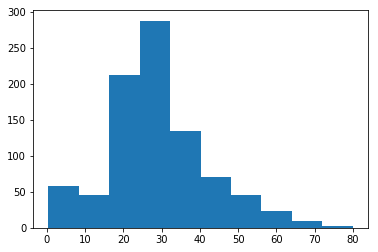

In [13]:
plt.hist(df_train.Age)

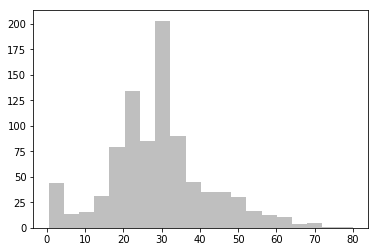

In [14]:
#Use show method to hide additional data (or can use semicolon)

plt.hist(df_train.Age,bins=20,color='grey',alpha=0.5)
plt.show()

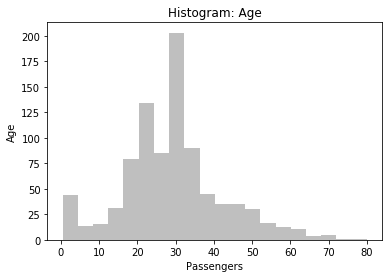

In [17]:
#Further customise chart:
plt.hist(df_train.Age,bins=20,color='grey',alpha=0.5)
plt.title('Histogram: Age')
plt.xlabel('Passengers')
plt.ylabel('Age')
plt.show()

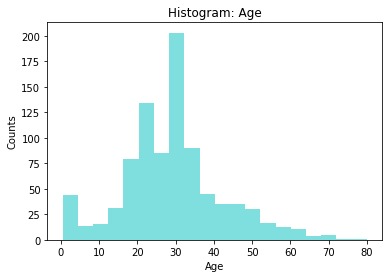

In [33]:
#Use subplots function to create more complex charts
f, ax=plt.subplots()
ax.hist(df_train.Age,bins=20,color='c',alpha=0.5)
ax.set_title('Histogram: Age')
ax.set_xlabel('Age')
ax.set_ylabel('Counts')
plt.show()

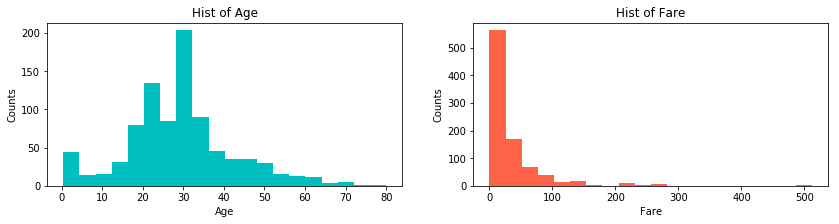

In [38]:
# Add multiple subplots using this approach:
# 2 plots within object f
# 1 row, 2 cols
# 14 inches across by 3 inches high
#F is the chart object, with 2 subplot objects ax1 and ax2

f, (ax1, ax2) = plt.subplots(1,2, figsize = (14,3))

ax1.hist(df_train.Age,color='c',bins=20,alpha=1)
ax1.set_title('Hist of Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Counts')

ax2.hist(df_train.Fare,color='tomato',bins=20,alpha=1)
ax2.set_title('Hist of Fare')
ax2.set_xlabel('Fare')
ax2.set_ylabel('Counts')

plt.show()

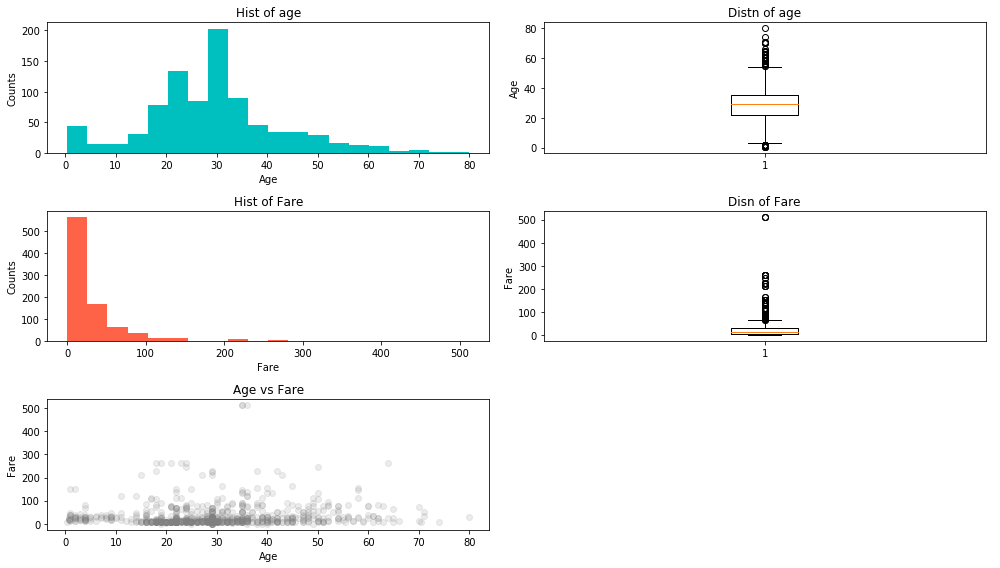

In [62]:
#Create many subplots within a single chart/figure object:
#Use ax_arr (axis array) using 2d coords to define which object sits where on the grid
#3 rows 2 cols, figsize in inches

f, ax_arr = plt.subplots(3,2, figsize=(14,8))

#Plot 1:
ax_arr[0,0].hist(df_train.Age,bins=20,color='c')
ax_arr[0,0].set_title('Hist of age')
ax_arr[0,0].set_xlabel('Age')
ax_arr[0,0].set_ylabel('Counts')

ax_arr[0,1].boxplot(df_train.Age)
ax_arr[0,1].set_title('Distn of age')
#ax_arr[0,1].set_xlabel('Age')
ax_arr[0,1].set_ylabel('Age')

#Plot 1:
ax_arr[1,0].hist(df_train.Fare,bins=20,color='tomato')
ax_arr[1,0].set_title('Hist of Fare')
ax_arr[1,0].set_xlabel('Fare')
ax_arr[1,0].set_ylabel('Counts')

ax_arr[1,1].boxplot(df_train.Fare)
ax_arr[1,1].set_title('Disn of Fare')
#ax_arr[1,1].set_xlabel('Age')
ax_arr[1,1].set_ylabel('Fare')

ax_arr[2,0].scatter(df_train.Age, df_train.Fare,color='grey',alpha=0.15)
ax_arr[2,0].set_title('Age vs Fare')
ax_arr[2,0].set_xlabel('Age')
ax_arr[2,0].set_ylabel('Fare')

ax_arr[2,1].axis('off') #hide 6th plot object

plt.tight_layout() #Prevents overlap of axes lables and titles

plt.show()

## Modelling:

#### Data Prep

In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 32 columns):
Survived              891 non-null int64
Age                   891 non-null float64
Fare                  891 non-null float64
family_size           891 non-null int64
is_mother             891 non-null int64
is_male               891 non-null int64
Deck_A                891 non-null int64
Deck_B                891 non-null int64
Deck_C                891 non-null int64
Deck_D                891 non-null int64
Deck_E                891 non-null int64
Deck_F                891 non-null int64
Deck_G                891 non-null int64
Deck_Z                891 non-null int64
Pclass_1              891 non-null int64
Pclass_2              891 non-null int64
Pclass_3              891 non-null int64
age_state_Adult       891 non-null int64
age_state_Child       891 non-null int64
Title_lady            891 non-null int64
Title_master          891 non-null int64
Title_miss            891 non-

In [72]:
#Convert data to Numpy Array, required structure for many machine learning algorithms
#Split data into X (attributes) and y (target) by selecting all cols starting from Age for X
#Convert features into float data type
#Standard notation to use upper case to represent a matrix (X) and lower case for a 1 dim vector (y)

X = df_train.loc[:,'Age':].as_matrix().astype('float')
y = df_train['Survived'].ravel() #np function creats 1 dimensional np array

C:\Users\jaylward\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [76]:
#review shape of NP arrays
print (X.shape, y.shape)

(891, 31) (891,)


In [79]:
#Split train data into train and test to validate performance of model outputs:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =0.2, random_state = 0)

print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(712, 31) (179, 31)
(712,) (179,)


### Baseline model:

In [83]:
# Start with a baseline model:
# ie. what accuracy and precision do we need to achieve in our model in order to beat chance
# For example, imagine 60% of passengers survived the titanic, if "predict" that every single person survivied
# We would have correctly predicted the outcome for 60% of passengers

#Mean survival rate in X:
print("Mean survival rate in train is: {0:.3f}".format(np.mean(y_train)))
print("Mean survival rate in test is: {0:.3f}".format(np.mean(y_test)))

#Did / did not survive relatively balanced
#If this is not the case, e.g. 95% survived, then you have an imbalanced class
#Will need to adjust to account for this, otherwise you could have a 95% accurate model by predicting 1 for all records!

Mean survival rate in train is: 0.383
Mean survival rate in test is: 0.385


In [84]:
import sklearn

In [87]:
#Check version
sklearn.__version__

'0.22.2.post1'

In [88]:
from sklearn.dummy import DummyClassifier

In [92]:
#create dummy model object:
model_dummy = DummyClassifier(strategy='most_frequent',random_state=0)

In [93]:
#Fit the model:
model_dummy.fit(X_train,y_train)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

In [95]:
#Now print out performance using .score function vs the test data:
#In this case, the anwer is blindingly obvious, but its good practice!
#Default output of .score() is model accuracy:

print("Score for model baseline is: {0:.3f}".format(model_dummy.score(X_test,y_test)))

Score for model baseline is: 0.615


In [100]:
#What about more details of model performance:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [101]:
#Use predict function to compare predicted score X_train again the results y_train
print("Score for model baseline is: {0:.3f}".format(accuracy_score(y_test,model_dummy.predict(X_test))))

Score for model baseline is: 0.615


In [102]:
#And print confusion matrix:
#TN  FP
#FN  TP

print("Confusion matrix for model baseline is: \n {0}".format(confusion_matrix(y_test,model_dummy.predict(X_test))))

Confusion matrix for model baseline is: 
 [[110   0]
 [ 69   0]]


In [104]:
#Precision and recall. This is to be expected since the model is not at all predective!
print("Score for model baseline is: {0:.3f}".format(precision_score(y_test,model_dummy.predict(X_test))))
print("Score for model baseline is: {0:.3f}".format(recall_score(y_test,model_dummy.predict(X_test))))

Score for model baseline is: 0.000
Score for model baseline is: 0.000


C:\Users\jaylward\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Kaggle Submission: Baseline Model

In [107]:
#Conver df_test to numpy matrix with type float
test_X = df_test.as_matrix().astype('float')

C:\Users\jaylward\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [108]:
#predict outputs (on our ~400 TEST records from Kaggle) using the dummy model we've built.

predictions = model_dummy.predict(test_X)

In [112]:
#Kaggle Submission file of PassengerId and prediction:
#get passenger ID from original test DF and predictions from model output of test data

df_submission = pd.DataFrame({'PassengerId':df_test.index,'Survived':predictions})

In [113]:
#Remember, the output is simply the most often occurring value = 0 predicted for all records
df_submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0

In [116]:
#Output data to file
submission_data_path = os.path.join(os.path.pardir,'data','external')
submission_file_path = os.path.join(submission_data_path,'01_dummy.csv')
submission_file_path

'..\\data\\external\\01_dummy.csv'

In [119]:
#Export without index
df_submission.to_csv(submission_file_path,index=False)

In [129]:
#Create a function we can call to get and output the model predictions to CSV for a given model and output file path


def get_submission_file(model,filename): #pass variables to def
    #Convert to matrix
    test_X = df_test.as_matrix().astype('float')
    #Output predictions from model variable on test_X
    predictions = model.predict(test_X)
    #Submission dataframe
    df_submission = pd.DataFrame({'PassengerId':df_test.index,'Survived':predictions})
    #Submission file path:
    submission_data_path = os.path.join(os.path.pardir,'data','external')
    submission_file_path = os.path.join(submission_data_path,filename)
    #Write to csv
    df_submission.to_csv(submission_file_path,index=False)


In [130]:
get_submission_file(model_dummy, '01_dummy.csv')

C:\Users\jaylward\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


## Logistic Regression Model

In [131]:
#import model from SKlearn
from sklearn.linear_model import LogisticRegression

In [138]:
#Create model object:
#Note: increase max_iter removes convergence warning, but what impact on accuracy? Or, more preprocessing required?
model_lr_1 = LogisticRegression(random_state=0,max_iter=1000)

In [139]:
#Fit the model - we've already created train test splits earlier on
model_lr_1.fit(X_train,y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
#Confirm accuracy using test data from train test split
print("Logistic regression model performance is: {0:.3f}".format(model_lr_1.score(X_test,y_test)))

Logistic regression model performance is: 0.832


In [149]:
#Accuracy, confusion matrix, precision, recall

print("Accuracy for regression model is: {0:.3f}".format(accuracy_score(y_test,model_lr_1.predict(X_test))))
print("Confusion Matrix for regression model is: \n {0}".format(confusion_matrix(y_test,model_lr_1.predict(X_test))))
print("Precision for regression model is: {0:.3f}".format(precision_score(y_test,model_lr_1.predict(X_test))))
print("Recall for regression model is: {0:.3f}".format(recall_score(y_test,model_lr_1.predict(X_test))))

Accuracy for regression model is: 0.832
Confusion Matrix for regression model is: 
 [[95 15]
 [15 54]]
Precision for regression model is: 0.783
Recall for regression model is: 0.783


In [151]:
#Get model coefficients / weightings:

model_lr_1.coef_

array([[-0.0321164 ,  0.0042073 , -0.53125012,  0.68914373, -1.05367469,
        -0.02070276, -0.30152421, -0.51964307,  0.39751468,  0.96800397,
         0.27676705, -0.2868085 , -0.51834688,  0.58828805,  0.12797005,
        -0.72099783, -0.18751691,  0.18277719,  0.22894969,  1.04907014,
         0.13958014, -1.64059779,  0.68040514, -0.46214704, -0.12506941,
        -0.04895156,  0.00653996,  0.16274129,  0.11634986,  0.11478662,
        -0.2358762 ]])

## 2nd Kaggle Submission:

In [153]:
#USe function created earlier:
get_submission_file(model_lr_1,'02_lr.csv')

C:\Users\jaylward\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


## Hyperperamater Optimisation:

In [195]:
#K fold cross validation:
#Use for hyperperatmeter testing

#create model object
#Speicify the solver algorithm
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#Liblinear good with small datasets like this
model_lr = LogisticRegression(random_state = 0,max_iter=1000, solver =  'liblinear')

In [196]:
#Grid search allows you to test a wide range of hyperparametes(s) values and identify the best outcome
from sklearn.model_selection import GridSearchCV

In [197]:
#Note, pentalty is L1, L2, not 11,12!
#C = regularisation parameter. 1 = more regular
#,'penalty': ['l1','l2'] = lgfgs doesn't appear to support L2 penalty (anymore)
parameters = {'C': [1,10,50,100,1000],'penalty': ['l1','l2']}

#Create GridSearch Object, pass model object and parameters
#CV=3 = 3 fold cross validation of dataset, splits training data multiple times into 3 sets (k-fold cross validation)
clf = GridSearchCV(model_lr,parameters,cv=3)

In [198]:
clf.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 50, 100, 1000], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [199]:
#Identify the best parameters
clf.best_params_

{'C': 1, 'penalty': 'l1'}

In [205]:
#And get the best score for the GridSearch object:
print("Best score is: {0:.3f}".format(clf.best_score_))

Best score is: 0.833


In [206]:
#Evaluate the model on on the test dataset from train_test split created earlier:
#By default, the clf object will return the BEST score available for the best hyperparameter range

print('Best official score for logistic regression model is: {0:.3f}'.format(clf.score(X_test,y_test)))

Best official score for logistic regression model is: 0.827


### Third Kaggle Submission:

In [208]:
#Pass 3rd submission filename and CLF object through our GET SUBMISSION FILE function:

get_submission_file(clf,'03_lr.csv')

C:\Users\jaylward\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


## Feature Normalisation and standardisation
Normalisation of fields to fit across the same or similar magnitude can often help improve model performance

Distribution of the fields may also impact model performance

In [209]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Feature Normalisation

In [212]:
#Create Feature Normalisation Object:

scaler = MinMaxScaler()
#Create a scaled variant of the training dataset
X_train_scaled = scaler.fit_transform(X_train)

In [213]:
type(X_train_scaled)

numpy.ndarray

In [225]:
#Confirm that values now fall between zero and 1 by taking min and max
print("min is: {0}".format(X_train_scaled[:,0].min()))
print("max is: {0}".format(X_train_scaled[:,0].max()))

min is: 0.0
max is: 1.0


In [226]:
#Normalise test data as well as train
X_test_scaled = scaler.transform(X_test)

In [298]:
#Feature standardisation: Zero mean and zero unit variance
scaler = StandardScaler()

In [299]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model with standardised data:

In [243]:
#Create model object:
model_lr = LogisticRegression(random_state = 0,max_iter=1000, solver =  'liblinear')

In [244]:
#Same GridSearch paramaters as above and k fold cross validation = 3 as above
parameters = {'C': [1,10,50,100,1000],'penalty': ['l1','l2']}

clf = GridSearchCV(model_lr,parameters,cv=3)
clf.fit(X_train_scaled,y_train) #remember Y is the Survived, just 1s and 0s

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 50, 100, 1000], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [241]:
clf.best_score_

0.8146237397912751

In [245]:
#Print the model performance using the TEST segment of the train test split
print('Best score for logistic regression regression model 2 is: {0:.3f}'.format(clf.score(X_test_scaled,y_test)))

Best score for logistic regression regression model 2 is: 0.838


In [247]:
#Only marginal gains vs the previous model
#So standardisation hasn't helped much for this model type
#For other, more complex algorithms, standardisation/normalisation can have a much higher impact

# Model Persistence:
Using Pickle and Flask to persist model and add API layer
Pickle allows you to persist your file or object by writing a binary file from your RAM and saving to disk

In [249]:
import pickle

In [301]:
#create file paths for both the model and the scalar object with scaled data
#use .pkl file extension to denote pickled files
model_file_path = os.path.join(os.path.pardir,'models','lr_models.pkl')
scaler_file_path = os.path.join(os.path.pardir,'models','lr_scalar.pkl')

In [302]:
#Open files in write binary mode
model_file_pickle = open(model_file_path,'wb') #write binary
scaler_file_pickle = open(scaler_file_path,'wb')

In [303]:
#Use pickle.dump to output our our model objects to binary files:
pickle.dump(clf,model_file_pickle)
pickle.dump(scaler,scaler_file_pickle)

In [304]:
#Close the files:
model_file_pickle.close()
scaler_file_pickle.close()

In [305]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

### Load the persisted files:

In [306]:
#From the models folder:
#Open the files in "read binary" mode
model_file_pickle = open(model_file_path,'rb')
scaler_file_pickle = open(scaler_file_path,'rb')
#Load the data into memory - unpickle them
clf_loaded = pickle.load(model_file_pickle)
scaler_loaded = pickle.load(scaler_file_pickle)
#Close files:
model_file_pickle.close()
scaler_file_pickle.close()

In [307]:
#Classifier object
clf_loaded

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 50, 100, 1000], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [309]:
#Scaler object
scaler_loaded

StandardScaler(copy=True, with_mean=True, with_std=True)

In [311]:
#To test, transform the test data using the scaler object:
X_test_scaled = scaler_loaded.transform(X_test)

In [313]:
#Returns the same model score as before, as it should!
print("Score for persisted model object is: {0:.3f}".format(clf_loaded.score(X_test_scaled,y_test)))

Score for persisted model object is: 0.838


## APIs with Flask: